<a href="https://colab.research.google.com/github/krishnavikas-7/INFO-5731/blob/main/In_class_exercise_05_1_vikas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The fifth in-class-exercise (40 points in total, 11/11/2021)**

(20 points) The purpose of the question is to practice different machine learning algorithms for text classification as well as the performance evaluation. In addition, you are requried to conduct *10 fold cross validation (https://scikit-learn.org/stable/modules/cross_validation.html)* in the training. 

The dataset can be download from here: https://github.com/unt-iialab/info5731_spring2021/blob/main/class_exercises/exercise09_datacollection.zip. The dataset contains two files train data and test data for sentiment analysis in IMDB review, it has two categories: 1 represents positive and 0 represents negative. You need to split the training data into training and validate data (80% for training and 20% for validation, https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and perform 10 fold cross validation while training the classifier. The final trained model was final evaluated on the test data. 

Algorithms:

(1) MultinominalNB

(2) SVM 

(3) KNN 

(4) Decision tree

(5) Random Forest

(6) XGBoost

Evaluation measurement:

(1) Accuracy

(2) Recall

(3) Precison 

(4) F-1 score

In [1]:
!pip install xgboost

In [2]:
# Write your code here
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold
from xgboost import XGBClassifier




In [3]:
pwd

'/content'

In [8]:
train = pd.read_csv(r'/content/stsa-train.txt',sep = 'delimiter=',header= None,names=['Text'])
train[['Sentiment','Text']] = train["Text"].str.split(" ", 1, expand=True)
test = pd.read_csv(r'/content/stsa-test.txt',sep = 'delimiter=',header= None,names=['Text'])
test[['Sentiment','Text']] = test["Text"].str.split(" ", 1, expand=True)
train.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


,Text,Sentiment
0,"a stirring , funny and finally transporting re...",1
1,apparently reassembled from the cutting-room f...,0
2,they presume their audience wo n't sit still f...,0
3,this is a visually stunning rumination on love...,1
4,jonathan parker 's bartleby should have been t...,1


In [9]:
test.head()

,Text,Sentiment
0,"no movement , no yuks , not much of anything .",0
1,"a gob of drivel so sickly sweet , even the eag...",0
2,"gangs of new york is an unapologetic mess , wh...",0
3,"we never really feel involved with the story ,...",0
4,this is one of polanski 's best films .,1


In [10]:
import nltk
import re
import string
nltk.download('stopwords')
nltk.download('wordnet')
stopword=nltk.corpus.stopwords.words('english')
from nltk.stem import WordNetLemmatizer
wl= WordNetLemmatizer()
def clean_text(data):
  data="".join([word.lower() for word in data if word not in string.punctuation])
  data = re.sub("^\d+\s|\s\d+\s|\s\d+$", " ", data)
  tokens = re.split('\W+',data)
  data = [wl.lemmatize(word) for word in tokens if word not in stopword]
  return data

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [11]:
# Convert text and train data into numerical
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer(analyzer = clean_text)
X_tfidf = tfidf_vect.fit_transform(train['Text'])
print(X_tfidf.shape)
X_tfidf_df=pd.DataFrame(X_tfidf.toarray())
X_tfidf_df.columns=tfidf_vect.get_feature_names()
X_test_tfidf = tfidf_vect.transform(test['Text'])
print(X_test_tfidf.shape)

(6920, 13343)
(1821, 13343)


In [12]:
## train-test split
x_train, x_test, y_train, y_test = train_test_split(X_tfidf_df, train['Sentiment'].values,
                                                test_size=0.2, random_state=42)

In [13]:
mnb = MultinomialNB()
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
mnb_test = mnb.fit(x_train,y_train)
y_mnb = mnb_test.predict(x_test)
print('Accuracy Score %s' % accuracy_score(y_mnb,y_test))
print(classification_report(y_test,y_mnb))
from sklearn.model_selection import cross_val_score
scores_MNB = cross_val_score(mnb, x_test, y_test, cv=10)
print("Accuracy with MNB",scores_MNB.mean())

Accuracy Score 0.7955202312138728
              precision    recall  f1-score   support

           0       0.85      0.70      0.77       671
           1       0.76      0.88      0.82       713

    accuracy                           0.80      1384
   macro avg       0.80      0.79      0.79      1384
weighted avg       0.80      0.80      0.79      1384

Accuracy with MNB 0.7247054530288813


In [14]:
svm = LinearSVC()
svm_test = svm.fit(x_train,y_train)
y_svm = svm_test.predict(x_test)
print('Accuracy Score %s' % accuracy_score(y_svm,y_test))
print(classification_report(y_test,y_svm))
from sklearn.model_selection import cross_val_score
scores_SVM = cross_val_score(svm, x_test, y_test, cv=10)
print("Accuracy with SVM",scores_SVM.mean())

Accuracy Score 0.791907514450867
              precision    recall  f1-score   support

           0       0.81      0.75      0.78       671
           1       0.78      0.83      0.80       713

    accuracy                           0.79      1384
   macro avg       0.79      0.79      0.79      1384
weighted avg       0.79      0.79      0.79      1384

Accuracy with SVM 0.7348034615785632


In [15]:
knn = KNeighborsClassifier(n_neighbors=5,n_jobs=-1)
knn_test = knn.fit(x_train,y_train)
y_knn = knn_test.predict(x_test)
print('Accuracy Score %s' % accuracy_score(y_knn,y_test))
print(classification_report(y_test,y_knn))
from sklearn.model_selection import cross_val_score
scores_KNN = cross_val_score(knn, x_test, y_test, cv=10)
print("Accuracy with knn",scores_KNN.mean())

Accuracy Score 0.7398843930635838
              precision    recall  f1-score   support

           0       0.74      0.70      0.72       671
           1       0.74      0.77      0.75       713

    accuracy                           0.74      1384
   macro avg       0.74      0.74      0.74      1384
weighted avg       0.74      0.74      0.74      1384

Accuracy with knn 0.6675737670732979


In [16]:
dt = DecisionTreeClassifier()
des_tree_test = dt.fit(x_train,y_train)
y_des_tree = des_tree_test.predict(x_test)
print('Accuracy Score %s' % accuracy_score(y_des_tree,y_test))
print(classification_report(y_test,y_des_tree))
scores_DT = cross_val_score(dt, x_test, y_test, cv=10)
print("Accuracy with Decision trees",scores_DT.mean())

Accuracy Score 0.6611271676300579
              precision    recall  f1-score   support

           0       0.66      0.62      0.64       671
           1       0.66      0.70      0.68       713

    accuracy                           0.66      1384
   macro avg       0.66      0.66      0.66      1384
weighted avg       0.66      0.66      0.66      1384

Accuracy with Decision trees 0.6091074966114065


In [17]:
import warnings
warnings.filterwarnings('ignore')
xgb = XGBClassifier()
xgb_test = xgb.fit(x_train,y_train)
y_xgb = xgb_test.predict(x_test)
print('Accuracy Score %s' % accuracy_score(y_xgb,y_test))
print(classification_report(y_test,y_xgb))
scores_XGB = cross_val_score(xgb, x_test, y_test, cv=10)
print("Accuracy with XGBoost",scores_XGB.mean())

Accuracy Score 0.6445086705202312
              precision    recall  f1-score   support

           0       0.75      0.40      0.52       671
           1       0.61      0.88      0.72       713

    accuracy                           0.64      1384
   macro avg       0.68      0.64      0.62      1384
weighted avg       0.68      0.64      0.62      1384

Accuracy with XGBoost 0.6184704410384736


(20 points) The purpose of the question is to practice different machine learning algorithms for text clustering
Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)

Apply the listed clustering methods to the dataset:

K means, 
DBSCAN,
Hierarchical clustering. 

You can refer to of the codes from  the follwing link below. 
https://www.kaggle.com/karthik3890/text-clustering 

In [18]:
!pip install textblob

In [44]:
import pandas as pd
df = pd.read_csv('/content/Amazon_Unlocked_Mobile.csv')
df.head()




,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0


In [46]:
df.shape

(413840, 6)

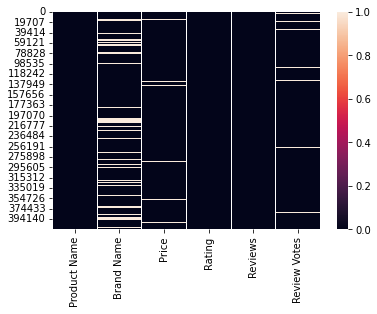

In [47]:
import seaborn as sns
sns.heatmap(df.isnull())

In [49]:
removing_null_values = df.dropna()

In [50]:
removing_null_values.shape

(334335, 6)

In [52]:
!pip install textblob

In [53]:
from nltk.corpus import stopwords
import nltk
from textblob import Word
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [54]:
from sklearn.cluster import KMeans
import numpy as np 
import matplotlib.pyplot as plt
from sklearn import metrics
import gensim
import scipy
from scipy.cluster import hierarchy
from sklearn.cluster import AgglomerativeClustering

In [58]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
bow = count_vect.fit_transform(removing_null_values['Reviews'].values)

In [59]:
column_names = count_vect.get_feature_names()

In [ ]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 10, init='k-means++', n_jobs = -1, random_state=99)
model.fit(bow)

In [ ]:
from sklearn import metrics
silhouette_score = metrics.silhouette_score(bow, labels, metric='euclidean')
silhouette_score

In [ ]:
df = data_after_removing_null_values
df['BowLabel'] = model.labels_
df.groupby(['BowLabel'])['Reviews'].count()

In [ ]:
print("TF-IDF Cluster Labels:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = count_vect.get_feature_names()
for i in range(10):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind], end='')
        print()

In [ ]:
#DBSCAN
from sklearn.cluster import DBSCAN
minPts = 2 * 100
def lower_bound(nums, target):
    l, r = 0, len(nums) - 1
    while l <= r:
        mid = int(l + (r - l) / 2)
        if nums[mid] >= target:
            r = mid - 1
        else:
            l = mid + 1
    return l

def compute200thnearestneighbour(x, data):
    dists = []
    for val in data:
        dist = np.sum((x - val) **2 )
        if(len(dists) == 200 and dists[199] > dist):
            l = int(lower_bound(dists, dist))
            if l < 200 and l >= 0 and dists[l] > dist:
                dists[l] = dist
        else:
            dists.append(dist)
            dists.sort()
    
    return dists[199]

In [ ]:
twohundrethneigh = []
for val in sent_vectors[:1500]:
    twohundrethneigh.append( compute200thnearestneighbour(val, sent_vectors[:1500]) )
twohundrethneigh.sort()

In [ ]:
model = DBSCAN(eps = 5, min_samples = minPts, n_jobs=-1)
model.fit(sent_vectors)

In [ ]:
dbscandf = df
dbscandf['AVG-W2V Clus Label'] = model.labels_
dbscandf.groupby(['AVG-W2V Clus Label'])['Product Name', 'Brand Name', 'Reviews'].count()

In [ ]:
import scipy
from scipy.cluster import hierarchy
dendro=hierarchy.dendrogram(hierarchy.linkage(sent_vectors, method='ward'))

In [ ]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
Agg=cluster.fit_predict(sent_vectors)

In [ ]:
hcdf = dbscandf
hcdf['AVG-W2V Clus Label'] = cluster.labels_

In [ ]:
hcdf.groupby(['AVG-W2V Clus Label'])['Reviews'].count()

In one paragraph, please compare K means, DBSCAN and Hierarchical clustering.

#You can write you answer here. (No code needed)

A hierarchical clustering is a set of nested clusters that are arranged as a tree. K Means clustering is found to work well when the structure of the clusters is hyper spherical (like circle in 2D, sphere in 3D). Hierarchical clustering don't work as well as, k means when the shape of the clusters is hyper spherical.DBScan classifed all the reviews into single cluster which is not best fit.